<a href="https://colab.research.google.com/github/dianamarchila/dianamarchila.github.io/blob/main/Clasificacion_MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de dígitos con el dataset MNSIT utilizando Naive Bayes

---

El conjunto de datos consta de un total de 70.000 imágenes; 60.000 imágenes de entrenamiento (usadas para crear un modelo de IR) y 10.000 imágenes de prueba (utilizadas para evaluar la exactitud del modelo). Cada imagen MNIST es una imagen digitalizada de un solo dígito manuscrita. Cada imagen es de 28 x 28 píxeles de tamaño. Cada valor de píxel está entre 0, que representa el blanco, y 255, que representa a negros.

# Cargue y revisión de los datos

MNIST es un conjunto de datos de dígitos escritos a mano, por lo que se utiliza comúnmente para la clasificación de imágenes. Originalmente los datos están en un formato de aproximación a imágenes donde cada celda corresponde a un pixel. Cada imagen está constituida por 784 pixeles, al convertirlos a imagen, tenemos imagenes de 28x28.

En el código que se muestra a continuación, se utilizan algunas librerías especializadas en el modelamiento de NaiveBayes como lo son GaussianNB.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)

In [24]:
import numpy as np
import pandas as pd

X = mnist['data']
y = mnist['target']

X.shape

y.shape

(70000,)

A continuación, podemos revisar un ejemplo de las imágenes que componen el dataset MNIST, en este caso la imagen tiene la etiqueta 7, aunque también la podríamos interprretar como un 1.

In [55]:
index = 42
y.loc[index]

'7'

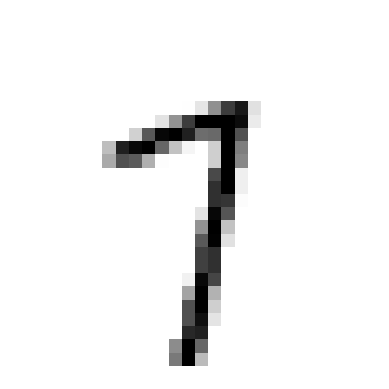

In [56]:
ejemplo = np.array(X.loc[index])
ejemplo_img = ejemplo.reshape(28, 28)

plt.imshow(ejemplo_img, cmap='binary')
plt.axis('off')
plt.show()

# Preprocesamiento de los datos

Una vez cargados los datos, para poder entrenar el modelo sin sesgos, es necesario dividir el dataset en datos de entrenamiento y datos de prueba. En este caso, de los 70.000 del dataset de entrenamiento, dejaremos 56.000 para entrenamiento del modelo y los 14.000 restantes para las pruebas de ajuste.

In [36]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
X_test.shape

(14000, 784)

# Entrenamiento del modelo

Usando las librerías mencionadas previamente, se hallan las probabilidades por medio de la función GaussianNB, de esta manera se obtienen los resultados

In [37]:
# Inicializar y entrenar el modelo Naive Bayes (GaussianNB)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# Desempeño del modelo

In [38]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 55.16%


Vemos en este caso un ejemplo donde el modelo logra predecir adecuadamente el número de la imagen.

In [66]:
# Evaluar la precisión del modelo
index = 1000

print("Etiqueta real: ", y_test.iloc[index])
print("Etiqueta predicha por el modelo: ",y_pred[index])


Etiqueta real:  6
Etiqueta predicha por el modelo:  6


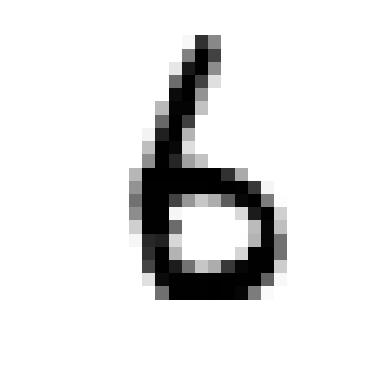

In [67]:
ejemplo = np.array(X_test.iloc[index])
ejemplo_img = ejemplo.reshape(28, 28)

plt.imshow(ejemplo_img, cmap='binary')
plt.axis('off')
plt.show()

Por otra parte, a continuación vemos que hay algunos números sobre los cuales es difícil que el modelo acierte, ya que se salen de un mismo margen de predicción y la forma no es clara.

In [68]:
# Evaluar la precisión del modelo
index = 100

print("Etiqueta real: ", y_test.iloc[index])
print("Etiqueta predicha por el modelo: ",y_pred[index])


Etiqueta real:  3
Etiqueta predicha por el modelo:  0


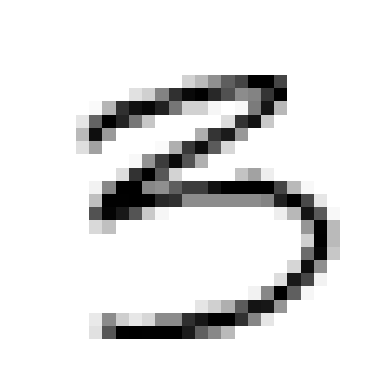

In [69]:
ejemplo = np.array(X_test.iloc[index])
ejemplo_img = ejemplo.reshape(28, 28)

plt.imshow(ejemplo_img, cmap='binary')
plt.axis('off')
plt.show()